In [577]:
# Create Fourier transformation on the WAV file
# Good ideas from here: https://stackoverflow.com/questions/23377665/python-scipy-fft-wav-files
# http://myinspirationinformation.com/uncategorized/audio-signals-in-python/
# https://stackoverflow.com/questions/23874017/calculate-fft-with-windowing-displacement-and-bandpass

import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy.io import wavfile
from scipy.signal import blackman, hanning, hamming
import numpy as np
from scipy import signal

%matplotlib inline


# Size of each chunk for the FFT function to process
chunk_size = 4096

# Location of the song
files_location = "/Users/valentin/Documents/MusicEngine/wav/"     #"/Users/valentin/Documents/MusicEngine/wav/"
song_id = "TARGET_Biz_Amulet"                                        #"TARGET_Biz_Amulet"

# Returns the sample rate (in samples/sec) and data from a WAV file
fs, soundtrack_data = wavfile.read(files_location + song_id + ".wav")

audio_data = soundtrack_data.T[0]                      # this is a two channel soundtrack, get only one of the tracks

# Create a 5 second test file from the rap beats
#audio_data = audio_data[0:(44100*5)]
wavfile.write(files_location + "test.wav", rate = 44100, data = audio_data)


In [578]:
audio_data.shape

(11395552,)

In [598]:
samples_per_second = 224

# Create a hanning window with a defined sample length. It should be a power of 2, but less than 44100. Ideally around 2048
window = hanning(int(len(audio_data) / samples_per_second))
print("The number of windows is: ", len(window))

# Create an array shape needed for the FFT function
audio_data_complex = audio_data.astype(complex)
audio_data_complex = audio_data_complex.reshape(samples_per_second, int(len(audio_data_complex)/samples_per_second))

# Create an array to hold the results from FFT
fft_raw_array = np.empty([samples_per_second, int(len(audio_data)/samples_per_second)], dtype = complex)


The number of windows is:  50873


In [599]:
# Hanning window to apply FFT
for i in range(samples_per_second):
    fft_raw_array[i,:] = fft(audio_data_complex[i,:] * window)

KeyboardInterrupt: 

In [ ]:
# Flatten the array - the resulting array will be as long as the original audio file
fft_raw_array = fft_raw_array.flatten()

In [ ]:
# The Fourier Transform creates a imaginary. The symmetry of the complex Fourier transform is very important
# A real time domain signal corresponds to a frequency spectrum with an even real part, and an odd imaginary part (http://www.analog.com/media/en/technical-documentation/dsp-book/dsp_book_Ch31.pdf)
# We only need the real data solution, so we can grab the first half, then calculate the frequency and plot the frequency against a scaled amplitude
length_audio_data = len(audio_data)
fft_transformed_real = fft_raw_array[0:int(length_audio_data / 2)]

# Scale by the number of observations so that the magnitude does not depend on the length
fft_transformed_real_scaled = fft_transformed_real / float(length_audio_data)

# Calculate the frequency at each point in Hz
frequency_of_song = np.arange(0, (length_audio_data / 2), 1.0) * (int(fs) / length_audio_data)

# Calculate power
power_db = 10 * np.log10(fft_transformed_real_scaled)

/Users/valentin/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


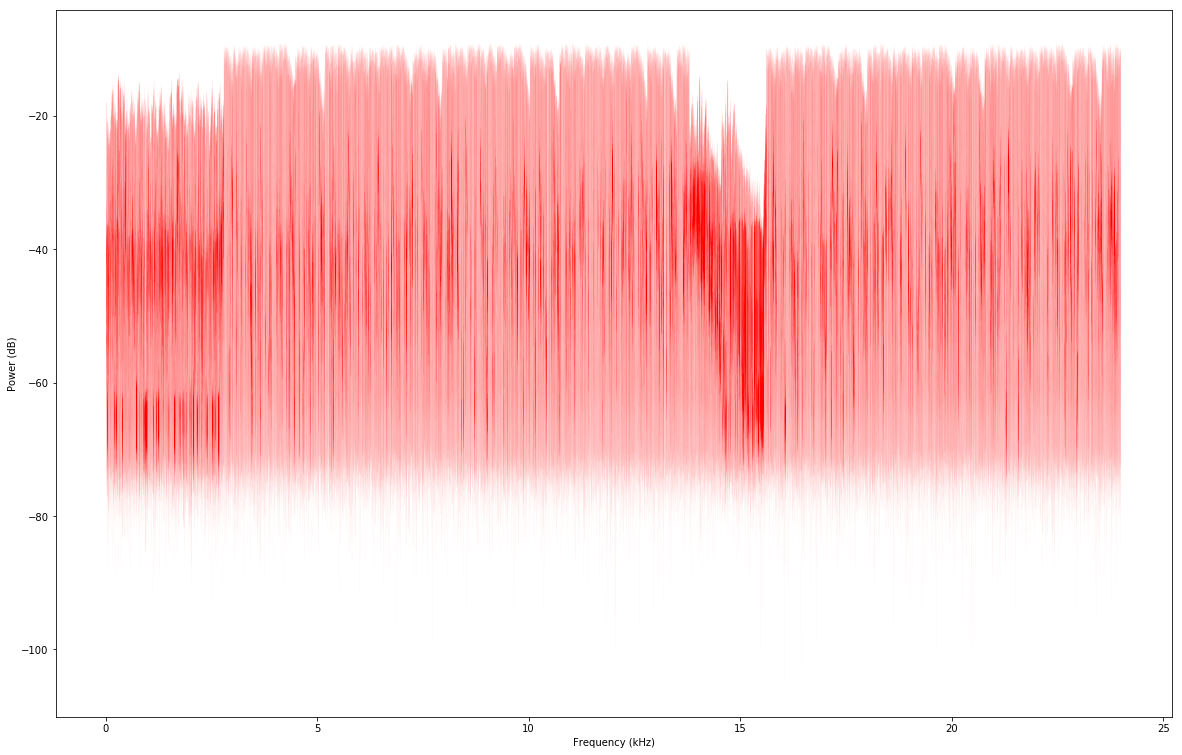

In [592]:
plt.figure(figsize = (20, 13))
plt.plot(frequency_of_song / 1000, power_db, color = '#ff0000', linewidth = 0.01)
plt.xlabel("Frequency (kHz)")
plt.ylabel("Power (dB)")

In [593]:
power_db.shape

(5697776,)